# Advanced plotting techniques (subplots, histograms, box plots)


# Subplots:

### 1. Generate a figure with 2x2 subplots, each containing a different type of plot (e.g., line plot, scatter plot, bar plot, and histogram).


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'E:\\IntenshipDatasets\\medical_records.csv'
df = pd.read_csv(file_path, nrows=10)

df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17


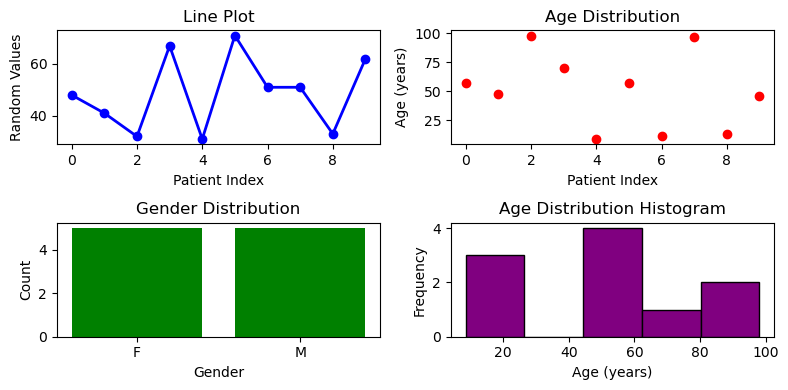

In [27]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age'] = (pd.Timestamp.now() - df['date_of_birth']).dt.days / 365.25

x = np.arange(len(df))
y = np.random.randint(10, 100, size=len(df)) 
bar_categories = df['gender'].unique()
bar_values = df['gender'].value_counts()
hist_data = df['age']

fig, axs = plt.subplots(2, 2, figsize=(8, 4))

axs[0, 0].plot(x, y, marker='o', color='b', linestyle='-', linewidth=2)
axs[0, 0].set_title('Line Plot')
axs[0, 0].set_xlabel('Patient Index')
axs[0, 0].set_ylabel('Random Values')

axs[0, 1].scatter(x, hist_data, marker='o', color='r')
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Patient Index')
axs[0, 1].set_ylabel('Age (years)')

axs[1, 0].bar(bar_categories, bar_values, color='g')

axs[1, 0].set_title('Gender Distribution')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(hist_data, bins=5, color='purple', edgecolor='black')
axs[1, 1].set_title('Age Distribution Histogram')
axs[1, 1].set_xlabel('Age (years)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2. Customize the subplots with titles, axis labels, and legends.


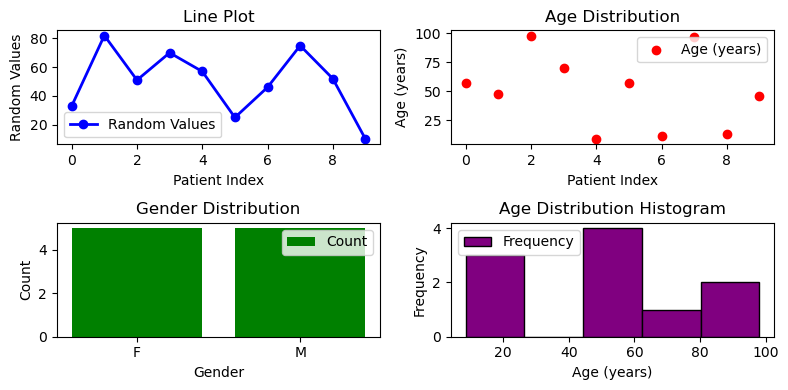

In [28]:
x = np.arange(len(df))
y = np.random.randint(10, 100, size=len(df))  
bar_categories = df['gender'].unique()
bar_values = df['gender'].value_counts()
hist_data = df['age']

fig, axs = plt.subplots(2, 2, figsize=(8, 4))


line = axs[0, 0].plot(x, y, marker='o', color='b', linestyle='-', linewidth=2, label='Random Values')
axs[0, 0].set_title('Line Plot')
axs[0, 0].set_xlabel('Patient Index')
axs[0, 0].set_ylabel('Random Values')
axs[0, 0].legend()


scatter = axs[0, 1].scatter(x, hist_data, marker='o', color='r', label='Age (years)')
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Patient Index')
axs[0, 1].set_ylabel('Age (years)')
axs[0, 1].legend()


bars = axs[1, 0].bar(bar_categories, bar_values, color='g', label='Count')
axs[1, 0].set_title('Gender Distribution')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend()


hist = axs[1, 1].hist(hist_data, bins=5, color='purple', edgecolor='black', label='Frequency')
axs[1, 1].set_title('Age Distribution Histogram')
axs[1, 1].set_xlabel('Age (years)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend(loc='upper left') 

plt.tight_layout()
plt.show()


# Histograms

### 1. Create a histogram for a given numerical data set. Customize the number of bins.

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

X = iris.data  
y = iris.target 

print("Shape of X:", X.shape) 
print("Shape of y:", y.shape)  


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

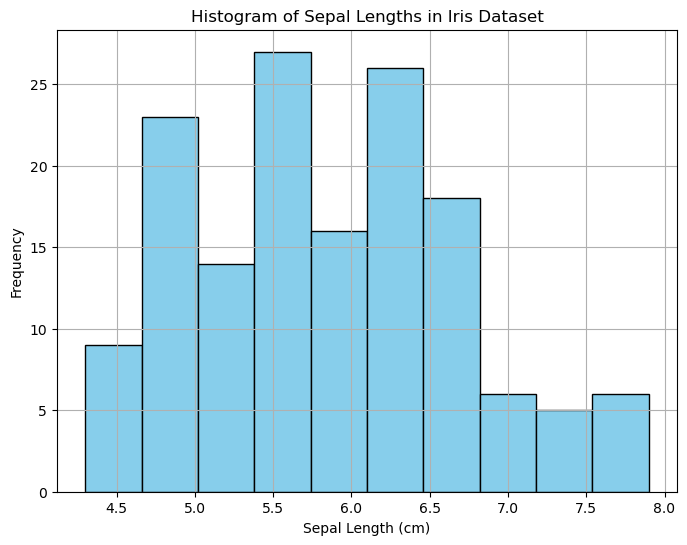

In [30]:
iris = load_iris()
data = iris.data

sepal_lengths = data[:, 0] 


plt.figure(figsize=(8, 6))
plt.hist(sepal_lengths, bins=10, color='skyblue', edgecolor='black')  # Customize number of bins here

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Lengths in Iris Dataset')

plt.grid(True)

plt.show()

### 2. Plot multiple histograms on the same figure to compare different data sets

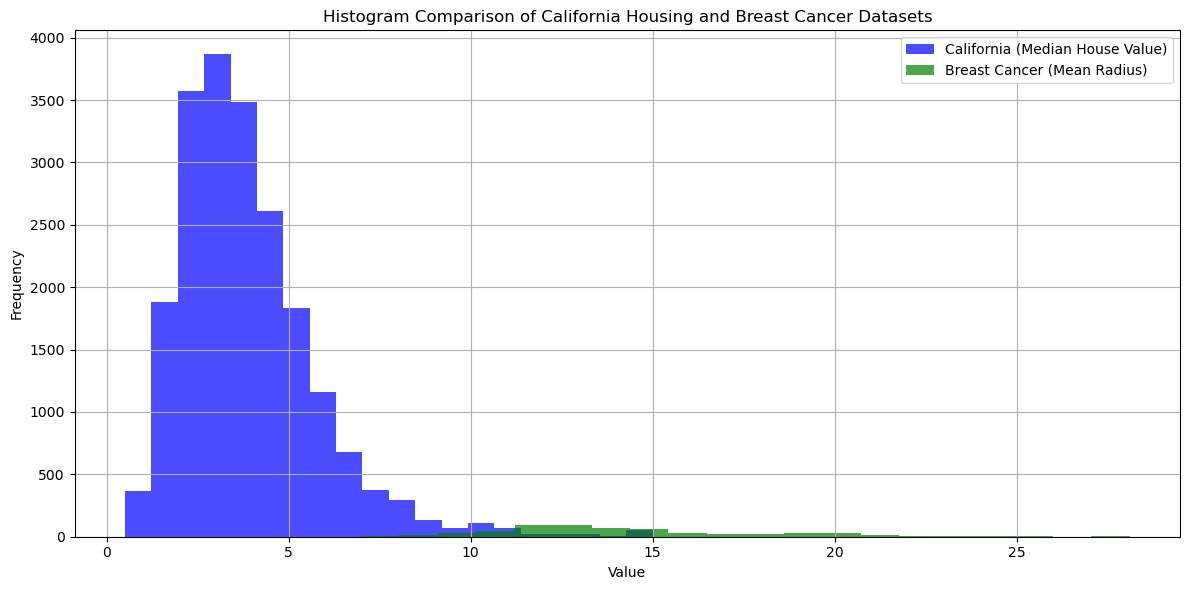

In [31]:
from sklearn.datasets import fetch_california_housing, load_breast_cancer


california = fetch_california_housing()
feature_california = california.data[:, 0] 


cancer = load_breast_cancer()
feature_cancer = cancer.data[:, 0] 


plt.figure(figsize=(12, 6))
plt.hist(feature_california, bins=20, alpha=0.7, label='California (Median House Value)', color='blue')
plt.hist(feature_cancer, bins=20, alpha=0.7, label='Breast Cancer (Mean Radius)', color='green')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Comparison of California Housing and Breast Cancer Datasets')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


### 3.Normalize the histograms and add appropriate labels and titles.


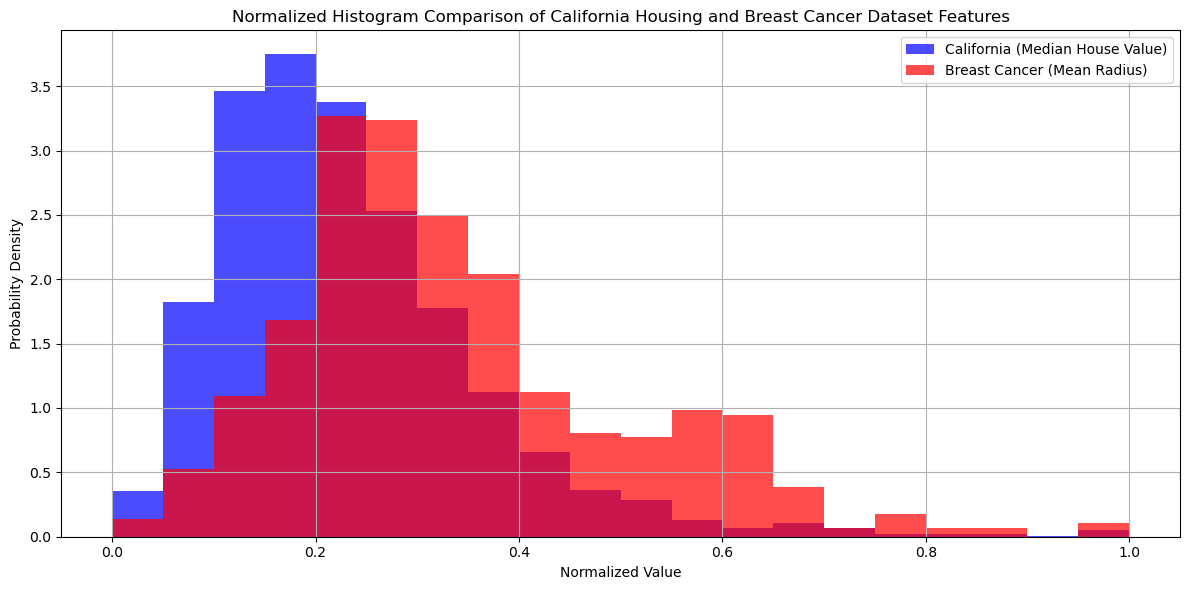

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler


california = fetch_california_housing()
feature_california = california.data[:, 0] 


breast_cancer = load_breast_cancer()
feature_breast_cancer = breast_cancer.data[:, 0]  # Mean radius


plt.figure(figsize=(12, 6))


scaler = MinMaxScaler()
feature_california_normalized = scaler.fit_transform(feature_california.reshape(-1, 1))
feature_breast_cancer_normalized = scaler.fit_transform(feature_breast_cancer.reshape(-1, 1))


plt.hist(feature_california_normalized, bins=20, alpha=0.7, label='California (Median House Value)', color='blue', density=True)
plt.hist(feature_breast_cancer_normalized, bins=20, alpha=0.7, label='Breast Cancer (Mean Radius)', color='red', density=True)

plt.xlabel('Normalized Value')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram Comparison of California Housing and Breast Cancer Dataset Features')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


# Box Plots

### 1. Create a box plot for a given numerical data set.


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


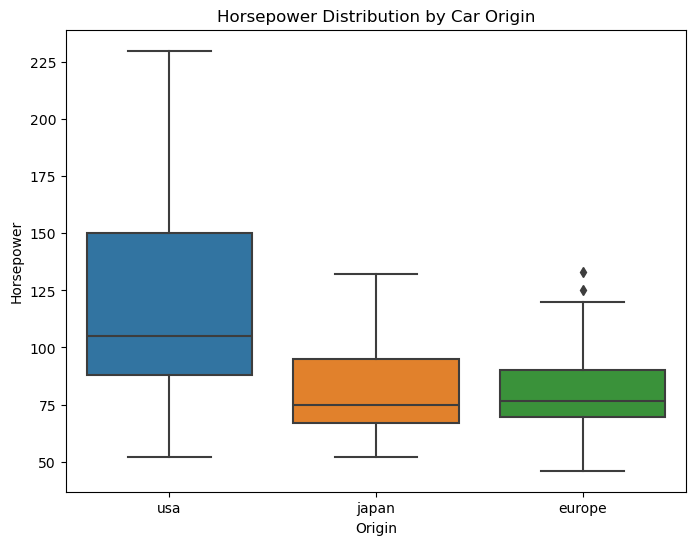

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset('mpg')
print(mpg.head())


plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='horsepower', data=mpg)

plt.xlabel('Origin')
plt.ylabel('Horsepower')
plt.title('Horsepower Distribution by Car Origin')

plt.show()


### 2. Generate multiple box plots in a single figure to compare different data sets.

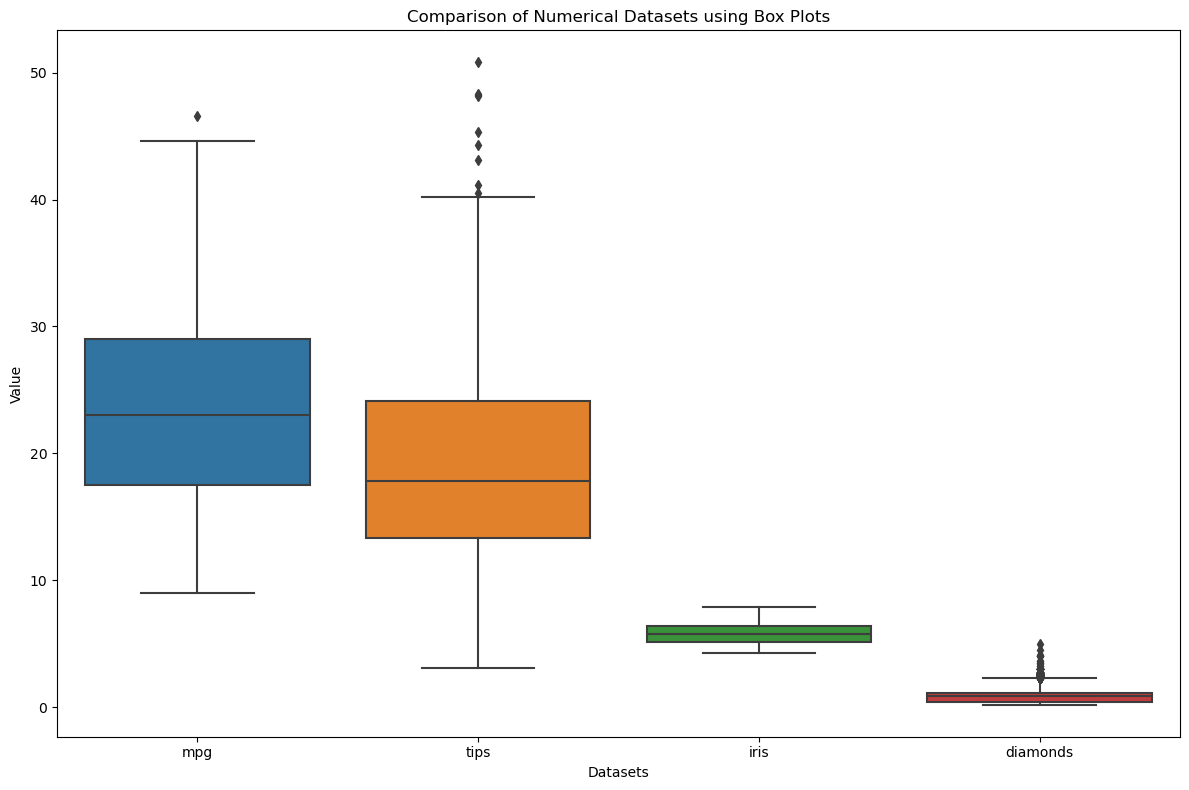

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


mpg = sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
diamonds = sns.load_dataset('diamonds')

numerical_cols = ['mpg', 'total_bill', 'sepal_length', 'carat']
datasets = [mpg, tips, iris, diamonds]
data = [dataset[num_col] for dataset, num_col in zip(datasets, numerical_cols)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='v', fliersize=5, linewidth=1.5, notch=False)

plt.xlabel('Datasets')
plt.ylabel('Value')
plt.title('Comparison of Numerical Datasets using Box Plots')

plt.xticks(range(len(datasets)), ['mpg', 'tips', 'iris', 'diamonds'])

# Show plot
plt.tight_layout()
plt.show()


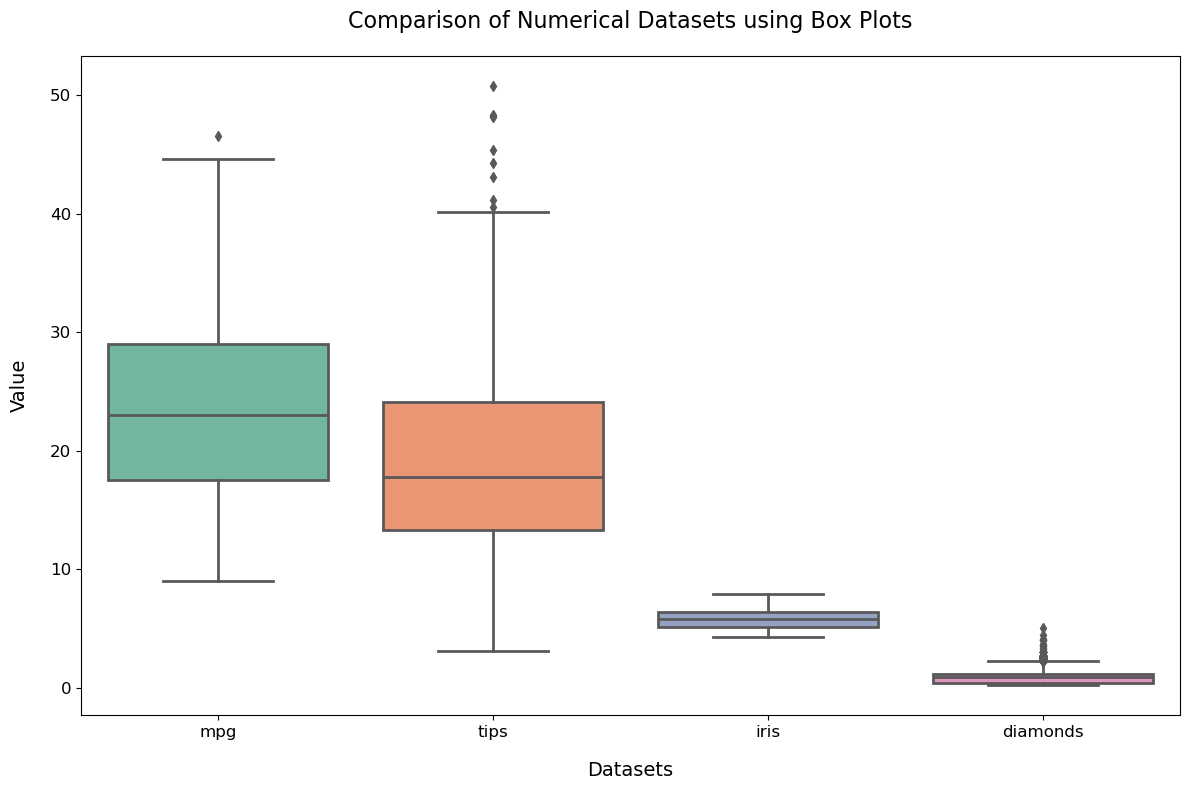

In [35]:
mpg = sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
diamonds = sns.load_dataset('diamonds')


numerical_cols = ['mpg', 'total_bill', 'sepal_length', 'carat']
datasets = [mpg, tips, iris, diamonds]
data = [dataset[num_col] for dataset, num_col in zip(datasets, numerical_cols)]


plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='v', fliersize=5, linewidth=2, notch=False,
            palette='Set2')  # Customize palette for colors

plt.xlabel('Datasets', fontsize=14, labelpad=15)
plt.ylabel('Value', fontsize=14, labelpad=15)
plt.title('Comparison of Numerical Datasets using Box Plots', fontsize=16, pad=20)

plt.xticks(range(len(datasets)), ['mpg', 'tips', 'iris', 'diamonds'], fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


# Aditional Tasks

### KS Plot

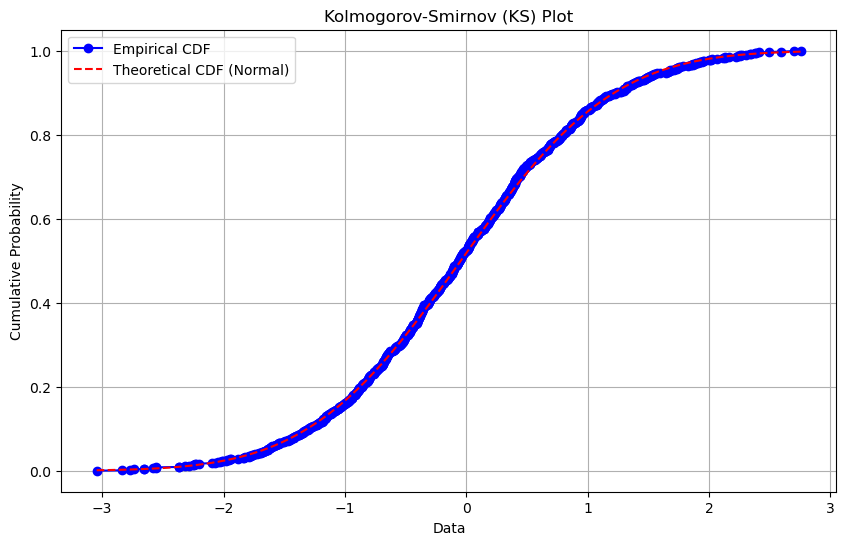

KS Statistic: 0.0190
P-value: 0.8548


In [36]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

norm_params = stats.norm.fit(data)
norm_dist = stats.norm(*norm_params)

x = np.linspace(np.min(data), np.max(data), 100)

empirical_cdf = np.linspace(0, 1, len(data))
theoretical_cdf = norm_dist.cdf(x)

plt.figure(figsize=(10, 6))
plt.plot(np.sort(data), empirical_cdf, linestyle='-', marker='o', color='b', label='Empirical CDF')
plt.plot(x, theoretical_cdf, linestyle='--', color='r', label='Theoretical CDF (Normal)')
plt.title('Kolmogorov-Smirnov (KS) Plot')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

ks_statistic, p_value = stats.kstest(data, 'norm', args=norm_params)
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


### ROC Curve

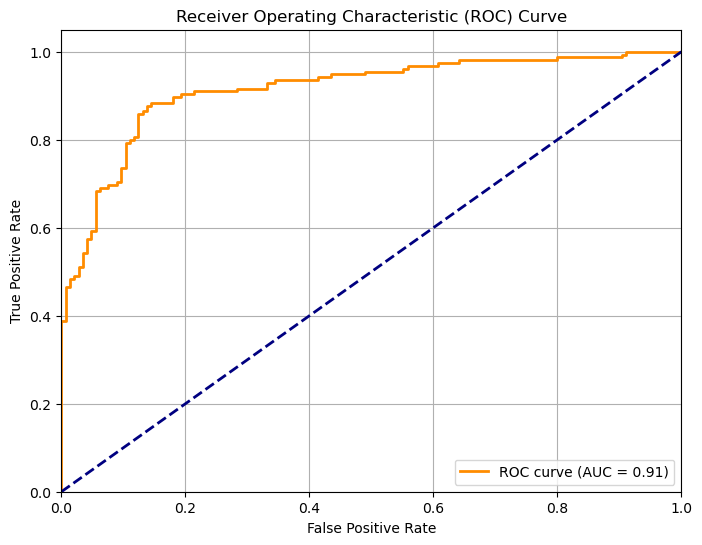

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### QQ Plot

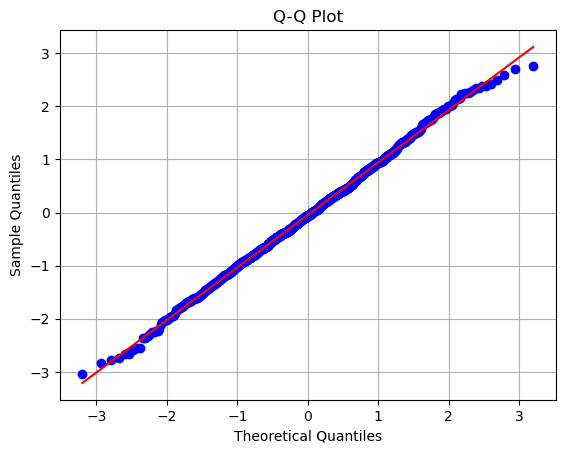

In [38]:
import scipy.stats as stats


np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


### Cumulative explain varience

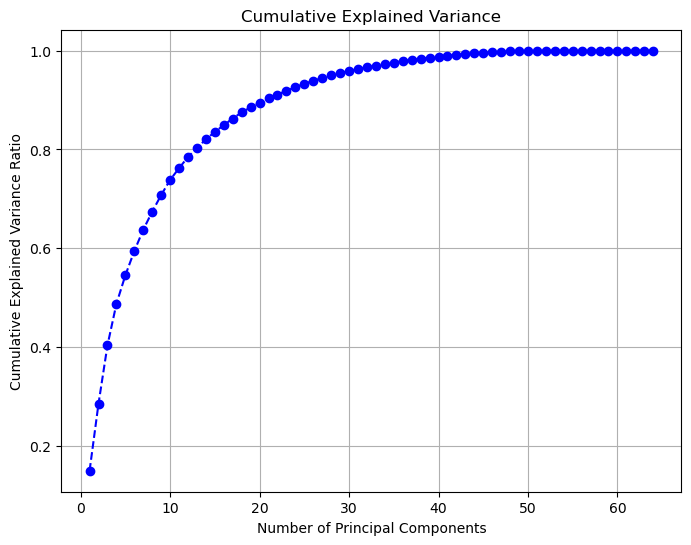

In [39]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data


pca = PCA(n_components=64)  # Use the full number of components for this example
pca.fit(X)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


### Gini Impurity vs Entrophy

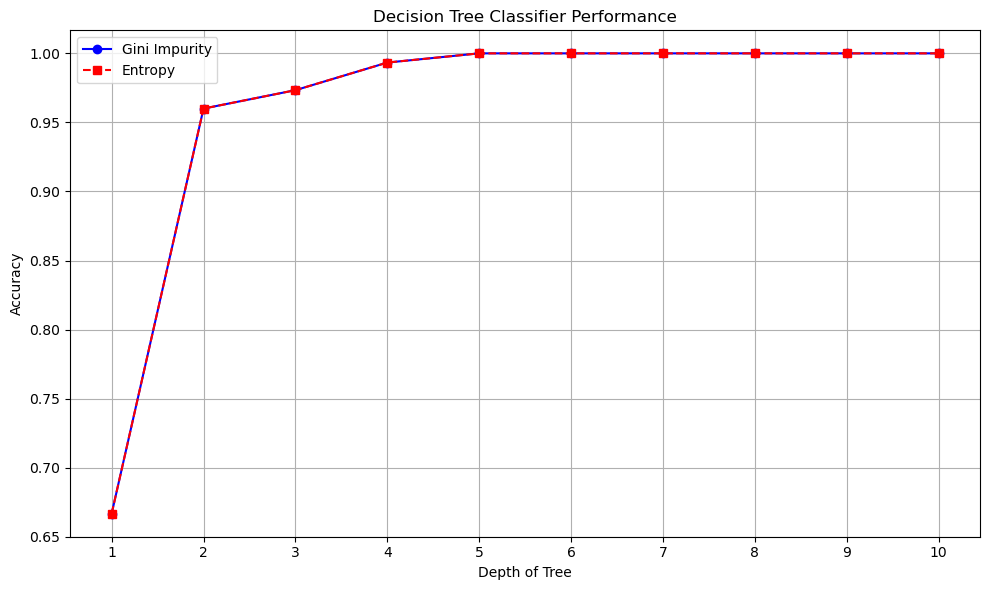

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


depths = range(1, 11)
gini_scores = []
entropy_scores = []

for depth in depths:
    # Create decision trees
    tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    
    # Fit models
    tree_gini.fit(X, y)
    tree_entropy.fit(X, y)
    
   
    gini_scores.append(tree_gini.score(X, y))
    entropy_scores.append(tree_entropy.score(X, y))

plt.figure(figsize=(10, 6))
plt.plot(depths, gini_scores, marker='o', linestyle='-', color='b', label='Gini Impurity')
plt.plot(depths, entropy_scores, marker='s', linestyle='--', color='r', label='Entropy')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Bias Varience Trade off

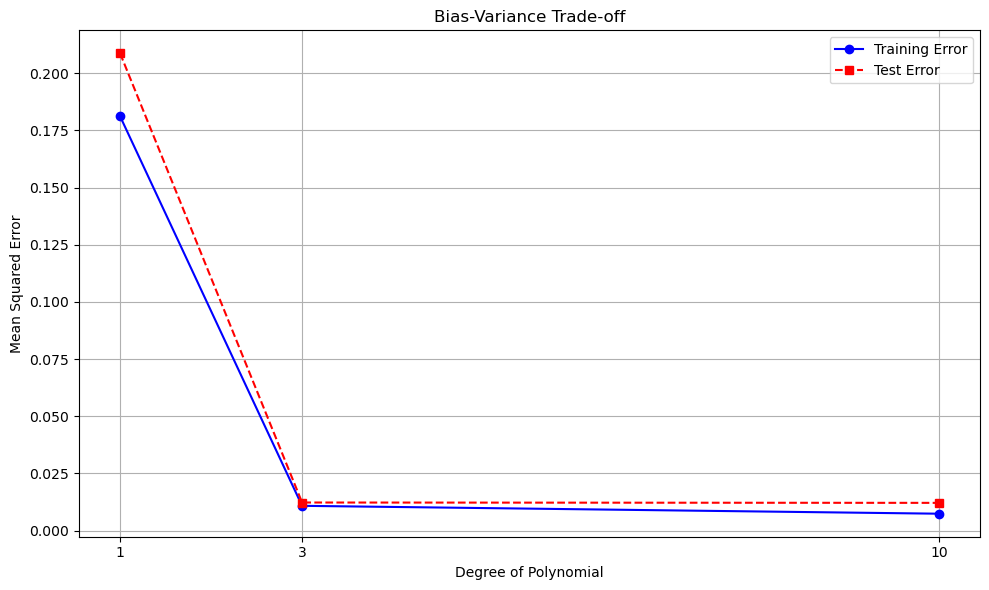

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


def fit_polynomial(degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    return model, train_error, test_error


degrees = [1, 3, 10]


models = []
train_errors = []
test_errors = []

for degree in degrees:
    model, train_error, test_error = fit_polynomial(degree)
    models.append(model)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', linestyle='-', color='b', label='Training Error')
plt.plot(degrees, test_errors, marker='s', linestyle='--', color='r', label='Test Error')
plt.title('Bias-Variance Trade-off')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
